In [38]:
import pandas as pd


In [2]:
vendas = pd.read_excel('C:/Users/salut/Downloads/vendas.xlsx')
display(vendas)

,Código Venda,Data,ID Loja,Produto,Quantidade,Valor Unitário,Valor Final
0,1,2019-01-01,Iguatemi Esplanada,Sapato Estampa,1,358,358
1,1,2019-01-01,Iguatemi Esplanada,Camiseta,2,180,360
2,1,2019-01-01,Iguatemi Esplanada,Sapato Xadrez,1,368,368
3,2,2019-01-02,Norte Shopping,Relógio,3,200,600
4,2,2019-01-02,Norte Shopping,Chinelo Liso,1,71,71
...,...,...,...,...,...,...,...
100994,69996,2019-12-26,Center Shopping Uberlândia,Short Listrado,2,102,204
100995,69996,2019-12-26,Center Shopping Uberlândia,Mochila,4,270,1080
100996,69996,2019-12-26,Center Shopping Uberlândia,Pulseira Estampa,1,87,87
100997,69997,2019-12-26,Ribeirão Shopping,Camisa Listrado,1,108,108


In [3]:
#sabendo se tem valores nulos
valores_nulos = vendas.isna().sum

In [ ]:
print(valores_nulos)

In [5]:
#saber quantos shopings existem
contagem_shopings = vendas['ID Loja'].value_counts()
print(contagem_shopings)

ID Loja
Shopping Vila Velha                 4234
Palladium Shopping Curitiba         4210
Norte Shopping                      4179
Rio Mar Shopping Fortaleza          4118
Bourbon Shopping SP                 4116
Iguatemi Campinas                   4108
Rio Mar Recife                      4099
Shopping Center Leste Aricanduva    4093
Shopping SP Market                  4080
Shopping Ibirapuera                 4051
Novo Shopping Ribeirão Preto        4049
Ribeirão Shopping                   4048
Salvador Shopping                   4030
Shopping Center Interlagos          4021
Shopping Iguatemi Fortaleza         4021
Center Shopping Uberlândia          4013
Shopping Eldorado                   4002
Passei das Águas Shopping           4000
Shopping União de Osasco            3995
Iguatemi Esplanada                  3980
Shopping Barra                      3962
Shopping Morumbi                    3960
Parque Dom Pedro Shopping           3902
Shopping Recife                     3891
Shopping

In [ ]:
faturamento = vendas[['ID Loja', 'Valor Final']].groupby('ID Loja').sum()


In [12]:
faturamento_ordenado = faturamento.sort_values(by = 'Valor Final')
display(faturamento_ordenado)

,Valor Final
ID Loja,
Shopping Morumbi,1586444
Shopping Midway Mall,1590441
Shopping Recife,1624879
Parque Dom Pedro Shopping,1631630
Shopping Ibirapuera,1635060
Shopping Center Interlagos,1640486
Salvador Shopping,1646739
Shopping Eldorado,1648111
Passei das Águas Shopping,1649014


In [13]:
produtos = vendas[['ID Loja', 'Quantidade']].groupby('ID Loja').sum()
display(produtos)

,Quantidade
ID Loja,
Bourbon Shopping SP,8863
Center Shopping Uberlândia,8627
Iguatemi Campinas,8935
Iguatemi Esplanada,8580
Norte Shopping,9014
Novo Shopping Ribeirão Preto,8751
Palladium Shopping Curitiba,9091
Parque Dom Pedro Shopping,8388
Passei das Águas Shopping,8618


In [17]:
#ticket médio dos projdutos por loja
#criando uma nova coluna
ticket= (faturamento['Valor Final'] / produtos['Quantidade']).to_frame('ticket_medio')
display(ticket)

,ticket_medio
ID Loja,
Bourbon Shopping SP,194.754598
Center Shopping Uberlândia,193.453228
Iguatemi Campinas,197.248909
Iguatemi Esplanada,198.098019
Norte Shopping,189.923231
Novo Shopping Ribeirão Preto,191.775226
Palladium Shopping Curitiba,189.321307
Parque Dom Pedro Shopping,194.519552
Passei das Águas Shopping,191.345324


In [20]:
tabela_final = faturamento.join(produtos).join(ticket)
tabela_final = tabela_final.sort_values(by = 'Valor Final', ascending = False)
display(tabela_final)

,Valor Final,Quantidade,ticket_medio
ID Loja,,,
Iguatemi Campinas,1762419,8935,197.248909
Shopping Vila Velha,1731167,9224,187.680724
Bourbon Shopping SP,1726110,8863,194.754598
Rio Mar Recife,1722766,8863,194.377299
Shopping SP Market,1721763,8927,192.871401
Palladium Shopping Curitiba,1721120,9091,189.321307
Norte Shopping,1711968,9014,189.923231
Ribeirão Shopping,1707122,8825,193.441586
Iguatemi Esplanada,1699681,8580,198.098019


In [22]:
import smtplib
import email.message

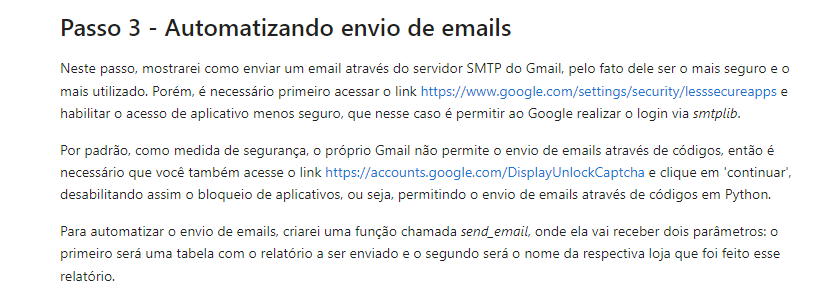

In [36]:
def send_email(tabela_final,store_name):
    msg = email.message.Message()
    message = f'''
    <p>Prezado, segue o relatório de vendas da sua loja.</p>
    {tabela_final.to_html()}
    '''
    #configurando os parametros da mensagem
    msg['Subject'] = f'Relatório - {store_name}'
    msg['From'] = 'melloamanda@id.uff.br'
    msg['To'] = 'mello.amanda.andrade@gmail.com'
    password = 'xxxxxx'
    #adicionando cabeçalho
    msg.add_header('Content-Type', 'text/html')
    msg.set_payload(message)
    #criando e configurando servidor
    server = smtplib.SMTP('smtp.gmail.com:587')
    server.starttls()
    server. login(msg['From'], password)
    #enviando e-mail atraves do servidor
    server.sendmail(msg['From'], [msg['To']], msg.as_string().encode('utf-8'))
    server.quit()
    

In [37]:
send_email(tabela_final, 'Todas as lojas')

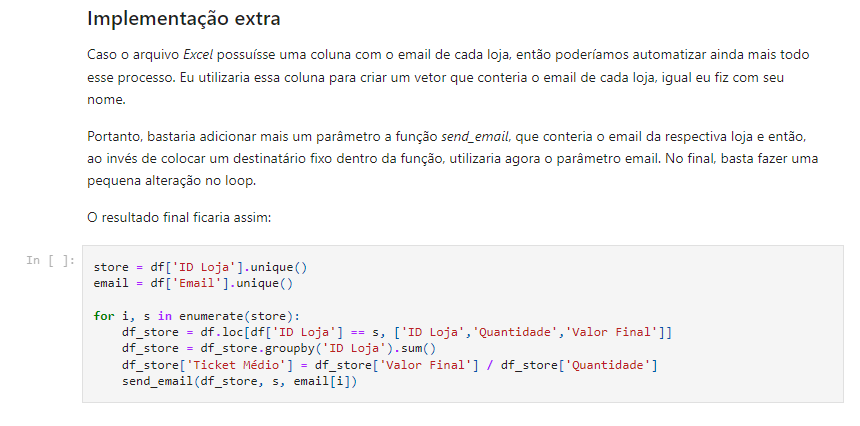